In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

### Open dataset

In [506]:
file = "UCI_Credit_Card.csv"
cc_df = pd.read_csv(file)

#### Validate successfully loaded dataset

In [426]:
cc_df.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,0,...,-0.671638,-0.662794,-0.652873,-0.339576,-0.223846,-0.294259,-0.305828,-0.313214,-0.292397,1
1,0,1,0,0,0,1,0,1,0,0,...,-0.620722,-0.605936,-0.598145,-0.339576,-0.210358,-0.237369,-0.242143,-0.313214,-0.179118,1
2,0,1,0,0,0,1,0,1,0,0,...,-0.448631,-0.416799,-0.391921,-0.247906,-0.188674,-0.237369,-0.242143,-0.247560,-0.009199,0
3,0,1,0,0,0,1,1,0,0,0,...,-0.231039,-0.186223,-0.156998,-0.218799,-0.166165,-0.225992,-0.235774,-0.243030,-0.235758,0
4,0,1,0,0,1,0,1,0,0,0,...,-0.345787,-0.347713,-0.331805,-0.218799,1.337083,0.274635,0.267339,-0.267978,-0.253939,0


### Dataset analysis

#### Dataset description

In [89]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Variables type information

In [90]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Empty values

In [91]:
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Separate numerical and categorical values

In [100]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
'PAY_4','PAY_5','PAY_6']
numerical_cols = cc_df.drop(['ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2',
'PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

#### Analize numerical values

In [101]:
print('Describing numerical columns')
print(cc_df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.

In [429]:
'''
target = cc_df.LIMIT_BAL.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.LIMIT_BAL.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

In [103]:
target = cc_df.AGE.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=24, Count=1127, Percentage=3.757%
Class=26, Count=1256, Percentage=4.187%
Class=34, Count=1162, Percentage=3.873%
Class=37, Count=1041, Percentage=3.470%
Class=57, Count=122, Percentage=0.407%
Class=29, Count=1605, Percentage=5.350%
Class=23, Count=931, Percentage=3.103%
Class=28, Count=1409, Percentage=4.697%
Class=35, Count=1113, Percentage=3.710%
Class=51, Count=340, Percentage=1.133%
Class=41, Count=824, Percentage=2.747%
Class=30, Count=1395, Percentage=4.650%
Class=49, Count=452, Percentage=1.507%
Class=39, Count=954, Percentage=3.180%
Class=40, Count=870, Percentage=2.900%
Class=27, Count=1477, Percentage=4.923%
Class=47, Count=501, Percentage=1.670%
Class=33, Count=1146, Percentage=3.820%
Class=32, Count=1158, Percentage=3.860%
Class=54, Count=247, Percentage=0.823%
Class=58, Count=122, Percentage=0.407%
Class=22, Count=560, Percentage=1.867%
Class=25, Count=1186, Percentage=3.953%
Class=31, Count=1217, Percentage=4.057%
Class=46, Count=570, Percentage=1.900%
Class=42, Co

In [427]:
'''
target = cc_df.BILL_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.BILL_AMT1.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

In [428]:
'''
target = cc_df.PAY_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.PAY_AMT1.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

#### Analyze categorical variables

In [102]:
print('Describing categorical columns')
print(cc_df[categorical_cols].describe())

Describing categorical columns
                SEX     EDUCATION      MARRIAGE           AGE         PAY_0  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.603733      1.853133      1.551867     35.485500     -0.016700   
std        0.489129      0.790349      0.521970      9.217904      1.123802   
min        1.000000      0.000000      0.000000     21.000000     -2.000000   
25%        1.000000      1.000000      1.000000     28.000000     -1.000000   
50%        2.000000      2.000000      2.000000     34.000000      0.000000   
75%        2.000000      2.000000      2.000000     41.000000      0.000000   
max        2.000000      6.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100  
std        1.197186    

In [10]:
target = cc_df['SEX'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=18112, Percentage=60.373%
Class=1, Count=11888, Percentage=39.627%


In [11]:
target = cc_df['EDUCATION'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=14030, Percentage=46.767%
Class=1, Count=10585, Percentage=35.283%
Class=3, Count=4917, Percentage=16.390%
Class=5, Count=280, Percentage=0.933%
Class=4, Count=123, Percentage=0.410%
Class=6, Count=51, Percentage=0.170%
Class=0, Count=14, Percentage=0.047%


In [12]:
target = cc_df['MARRIAGE'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=13659, Percentage=45.530%
Class=2, Count=15964, Percentage=53.213%
Class=3, Count=323, Percentage=1.077%
Class=0, Count=54, Percentage=0.180%


In [13]:
target = cc_df['PAY_0'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=2667, Percentage=8.890%
Class=-1, Count=5686, Percentage=18.953%
Class=0, Count=14737, Percentage=49.123%
Class=-2, Count=2759, Percentage=9.197%
Class=1, Count=3688, Percentage=12.293%
Class=3, Count=322, Percentage=1.073%
Class=4, Count=76, Percentage=0.253%
Class=8, Count=19, Percentage=0.063%
Class=7, Count=9, Percentage=0.030%
Class=5, Count=26, Percentage=0.087%
Class=6, Count=11, Percentage=0.037%


In [107]:
target = cc_df['PAY_2'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=3927, Percentage=13.090%
Class=0, Count=15730, Percentage=52.433%
Class=-1, Count=6050, Percentage=20.167%
Class=-2, Count=3782, Percentage=12.607%
Class=3, Count=326, Percentage=1.087%
Class=5, Count=25, Percentage=0.083%
Class=7, Count=20, Percentage=0.067%
Class=4, Count=99, Percentage=0.330%
Class=1, Count=28, Percentage=0.093%
Class=6, Count=12, Percentage=0.040%
Class=8, Count=1, Percentage=0.003%


In [108]:
target = cc_df['PAY_3'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=-1, Count=5938, Percentage=19.793%
Class=0, Count=15764, Percentage=52.547%
Class=2, Count=3819, Percentage=12.730%
Class=-2, Count=4085, Percentage=13.617%
Class=3, Count=240, Percentage=0.800%
Class=4, Count=76, Percentage=0.253%
Class=6, Count=23, Percentage=0.077%
Class=7, Count=27, Percentage=0.090%
Class=1, Count=4, Percentage=0.013%
Class=5, Count=21, Percentage=0.070%
Class=8, Count=3, Percentage=0.010%


#### Output variable

In [14]:
target = cc_df['default.payment.next.month'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=6636, Percentage=22.120%
Class=0, Count=23364, Percentage=77.880%


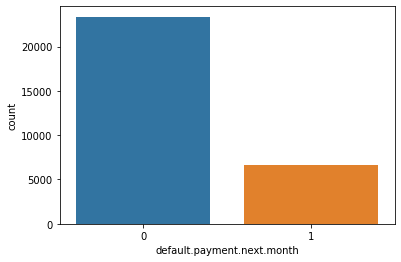

In [15]:
sns.countplot(x='default.payment.next.month', data=cc_df)
plt.show()

### Graphical analysis

#### Output variable

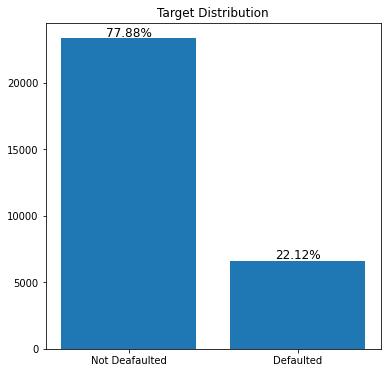

In [109]:
# Percentage of people who have Defaulted and not defaulted
target_count = cc_df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(cc_df['default.payment.next.month'])
not_def = len(cc_df[cc_df['default.payment.next.month']==0])/total *100
yes_def = len(cc_df[cc_df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(cc_df[cc_df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(cc_df[cc_df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

#### Analysis of categorical values

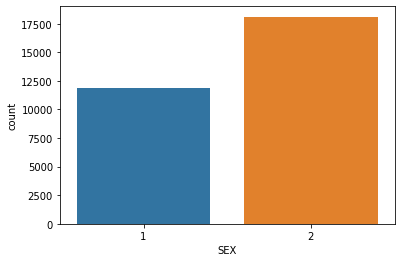

In [19]:
sns.countplot(x='SEX', data=cc_df)
plt.show()

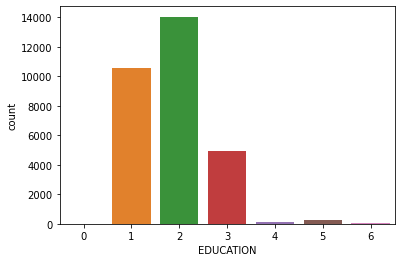

In [20]:
sns.countplot(x='EDUCATION', data=cc_df)
plt.show()

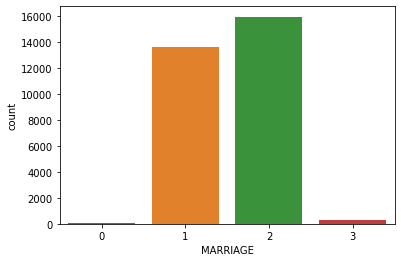

In [21]:
sns.countplot(x='MARRIAGE', data=cc_df)
plt.show()

<Figure size 432x432 with 0 Axes>

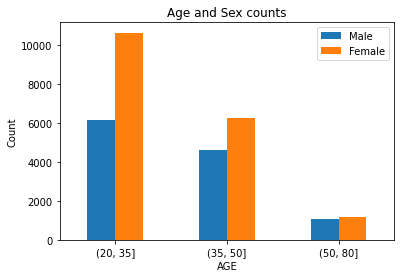

In [22]:
cc_df['AGE'] = pd.cut(cc_df.AGE, bins=[20,35,50,80])

target_count = cc_df.groupby(['AGE','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

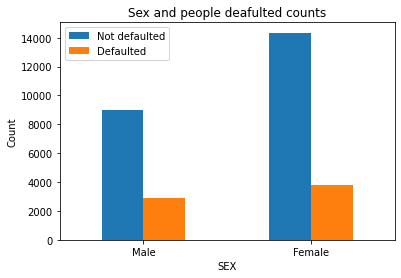

In [110]:
target_count = cc_df.groupby(['SEX','default.payment.next.month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

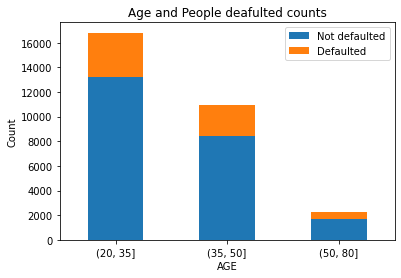

In [25]:
target_count = cc_df.groupby(['AGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

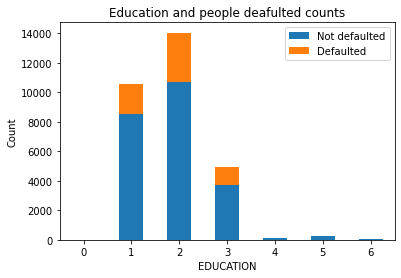

In [112]:
target_count = cc_df.groupby(['EDUCATION','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

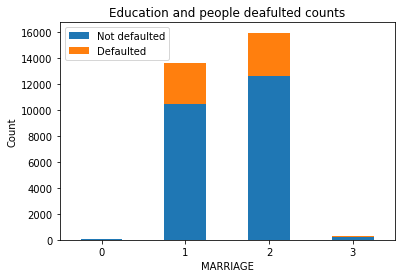

In [113]:
target_count = cc_df.groupby(['MARRIAGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

#### Analysis of numerical variables

##### Box-plot 

In [114]:
'''
numerical_cols.plot(kind='box')
plt.figsize=(20,10)
plt.xticks(rotation=90)
plt.show()
'''

"\nnumerical_cols.plot(kind='box')\nplt.figsize=(20,10)\nplt.xticks(rotation=90)\nplt.show()\n"

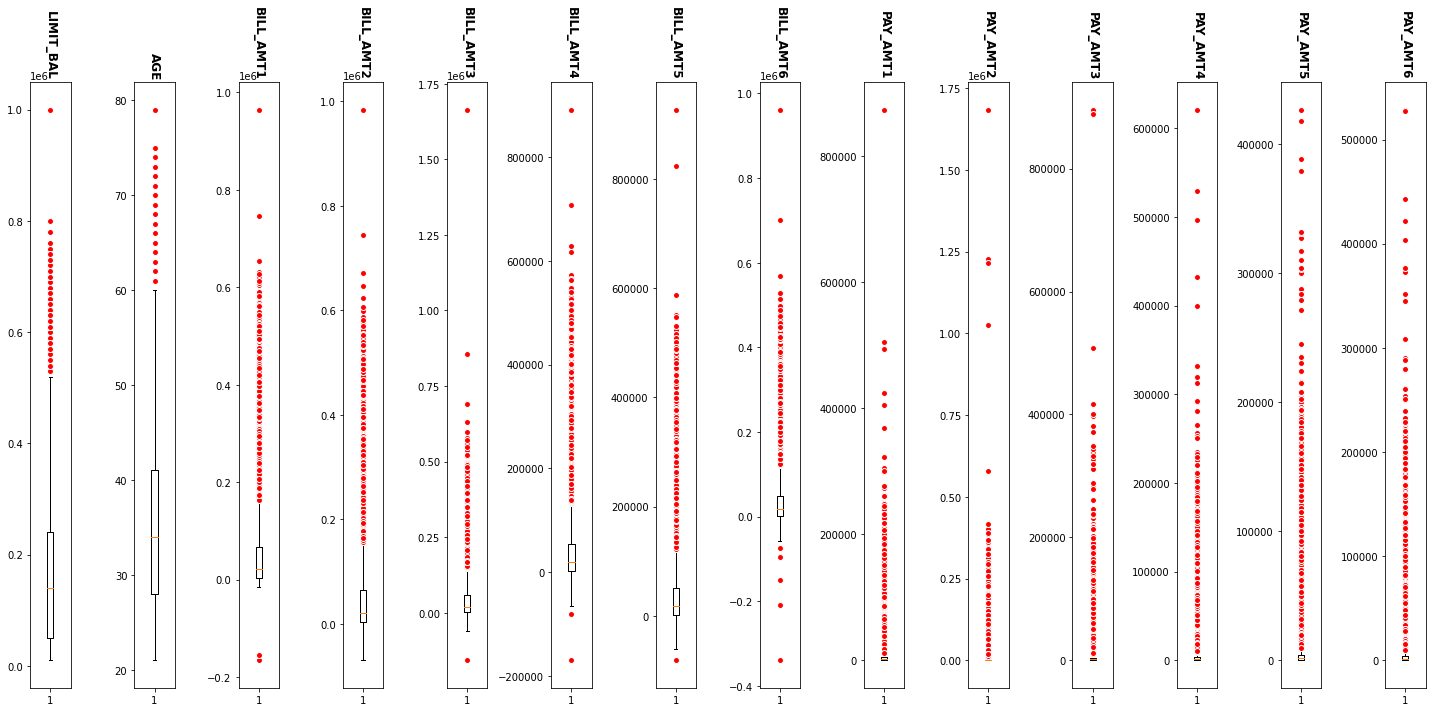

In [119]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(numerical_cols.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_cols.iloc[:,i], flierprops=red_circle)
    ax.set_title(numerical_cols.columns[i], rotation=270, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()

##### Histogram

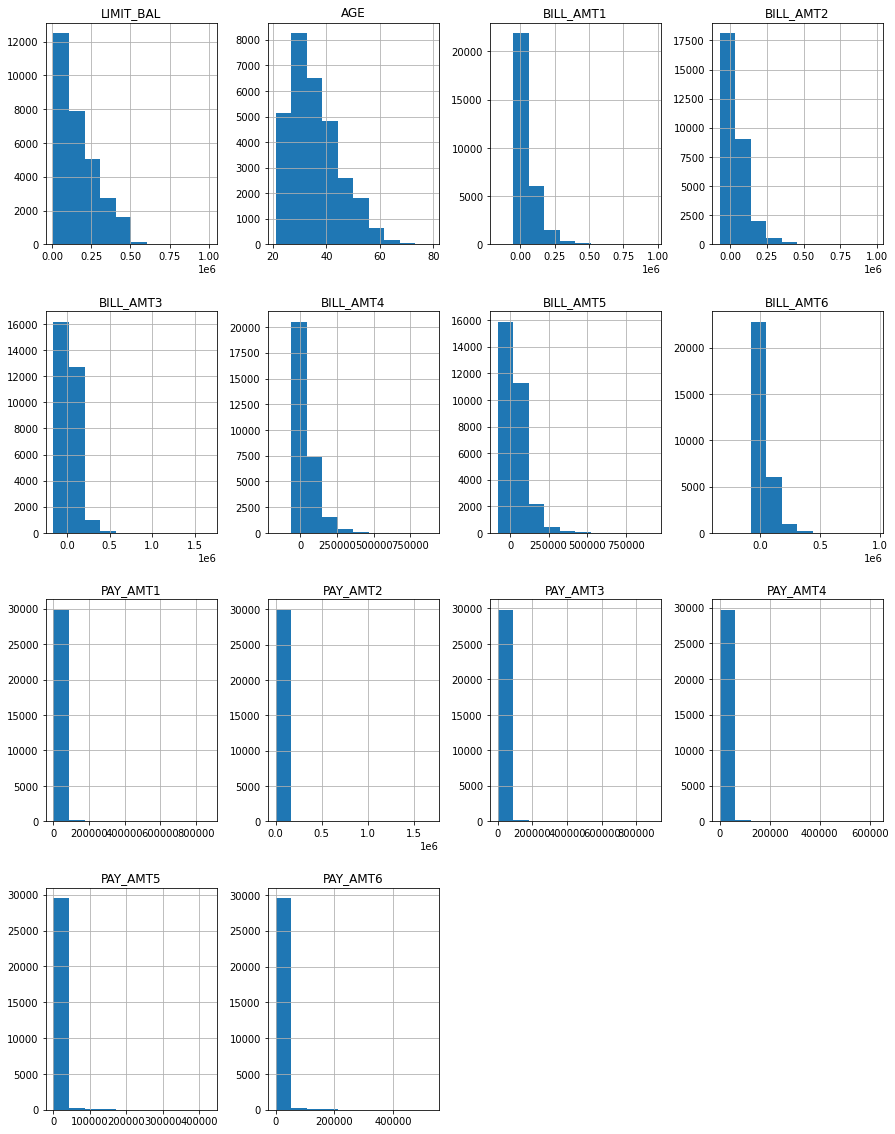

In [133]:
numerical_cols.hist(figsize = (15,20))
plt.show()

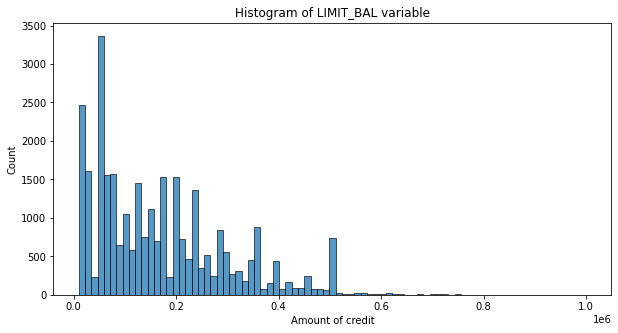

In [140]:
plt.subplots(figsize=(10,5))
plt.title('Histogram of LIMIT_BAL variable')
plt.xlabel('Amount of credit')
sns.histplot(cc_df.LIMIT_BAL)
plt.show()

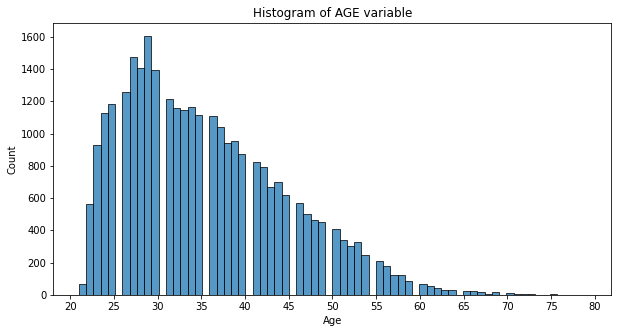

In [142]:
x = np.random.randint(low=0, high=80, size=100)
plt.subplots(figsize=(10,5))
plt.title('Histogram of AGE variable')
plt.xlabel('Age')
plt.xticks(np.arange(0, len(x)+1, 5))
sns.histplot(cc_df.AGE)
plt.show()

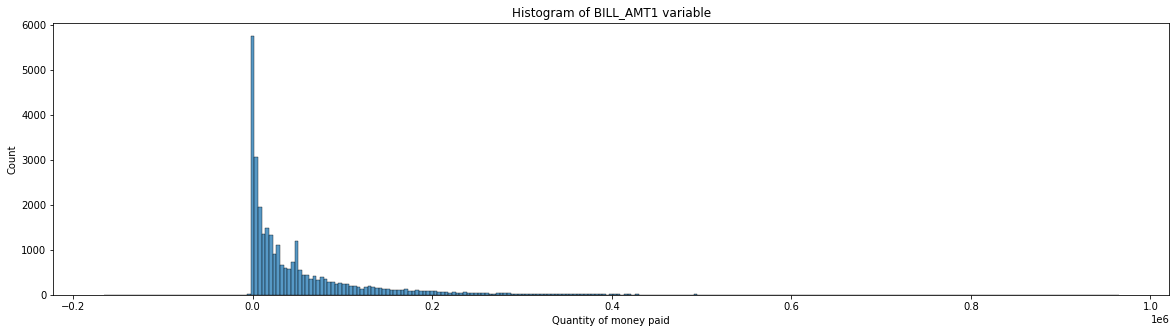

In [156]:
plt.subplots(figsize=(20,5))
plt.title('Histogram of BILL_AMT1 variable')
plt.xlabel('Quantity of money paid')
sns.histplot(cc_df.BILL_AMT1)
plt.show()

#### Correlation matrix

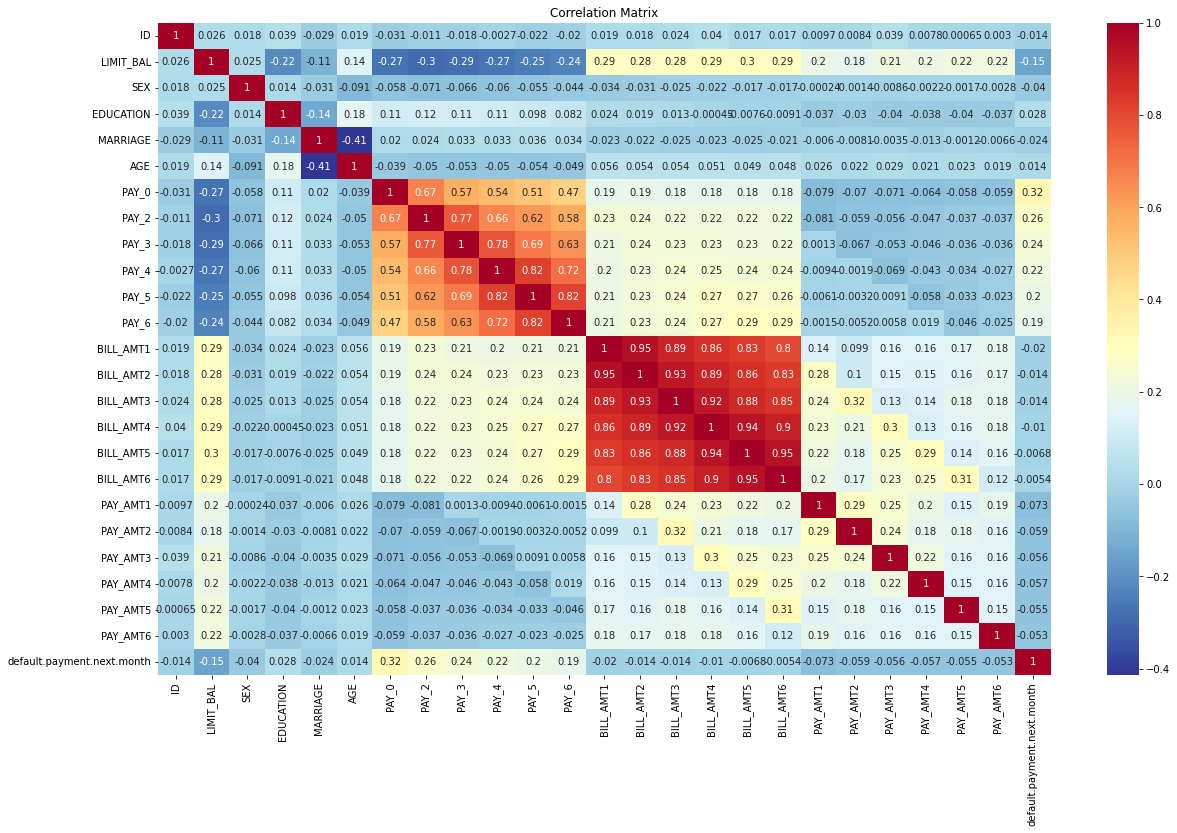

In [164]:
corr_mat = cc_df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

#### Graphic analysis of predictor variables with respect to the output

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

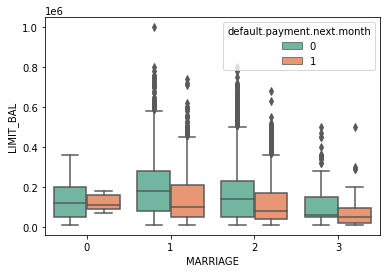

In [309]:
sns.boxplot(x= 'MARRIAGE', y= 'LIMIT_BAL',
            hue='default.payment.next.month',
            data= cc_df,
            palette = 'Set2')

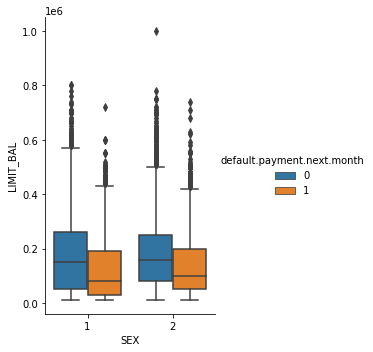

In [310]:
sns.catplot(x='SEX', y='LIMIT_BAL',
            hue='default.payment.next.month',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

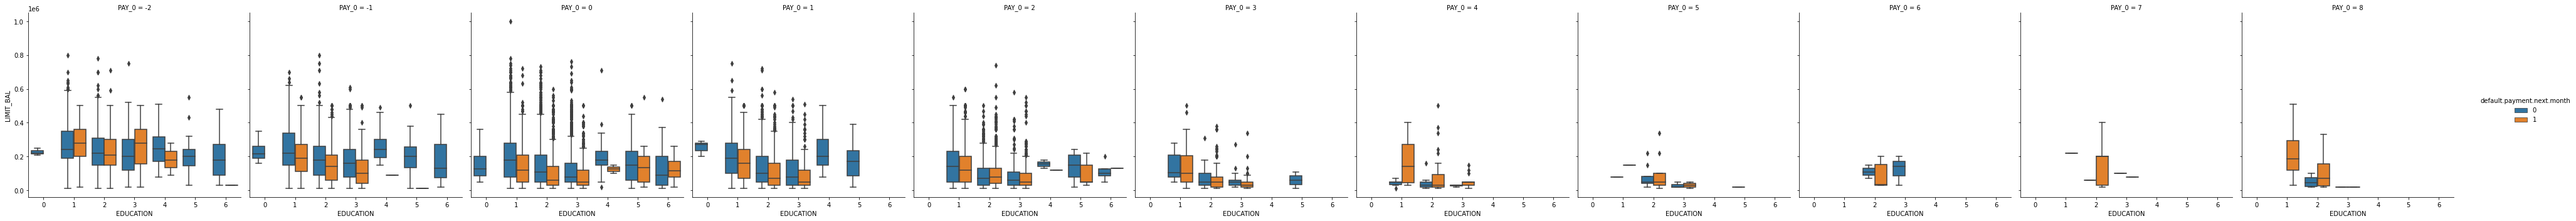

In [318]:
sns.catplot(x='EDUCATION', y='LIMIT_BAL',
            hue ='default.payment.next.month', col ='PAY_0',
            data=cc_df, kind="box")

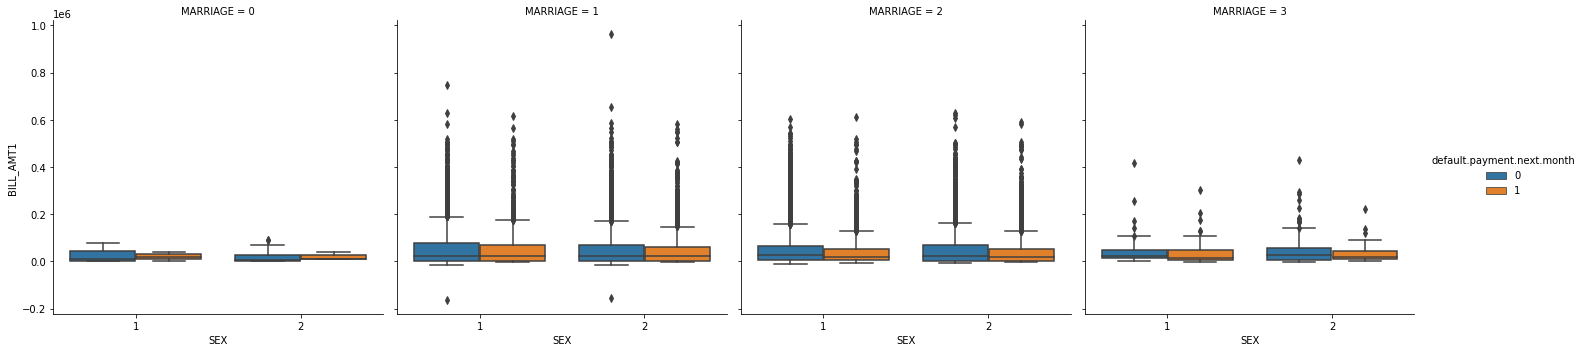

In [320]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default.payment.next.month', col ='MARRIAGE',
            data=cc_df, kind="box")

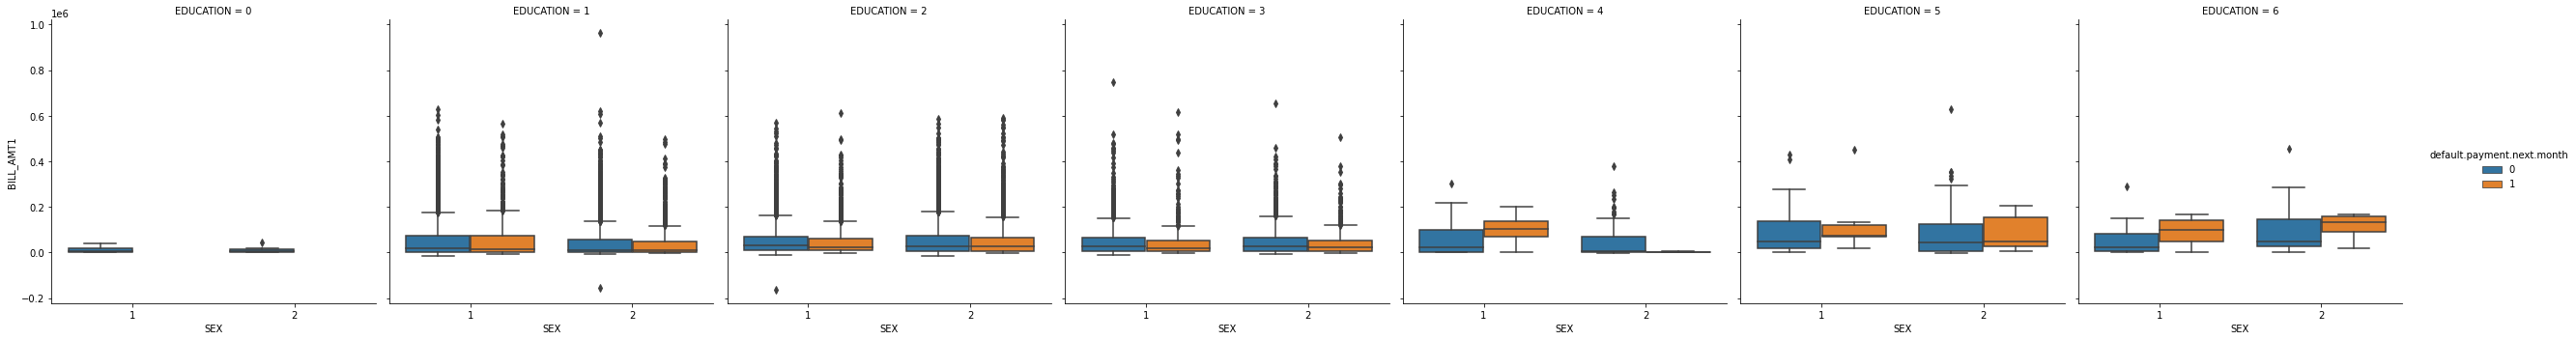

In [321]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default.payment.next.month', col ='EDUCATION',
            data=cc_df, kind="box")

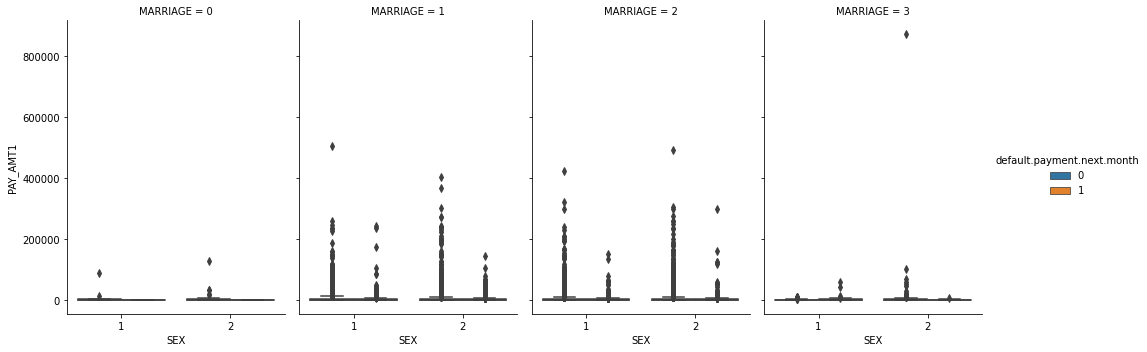

In [322]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default.payment.next.month', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

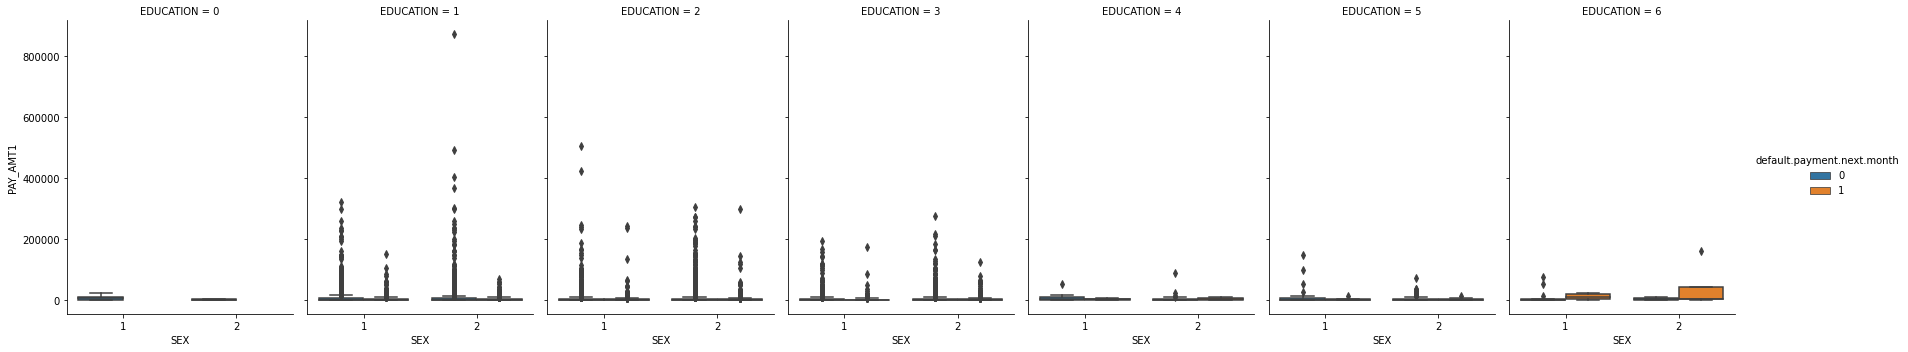

In [324]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default.payment.next.month', col ='EDUCATION',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

### Data cleaning

In [507]:
# Rename column PAY_0 to PAY_1
# Follow the same order as BILL_AMT and PAY_AMT
cc_df = cc_df.rename(columns={'PAY_0': 'PAY_1'})

In [508]:
# Rename column default.payment.next.month to payment
cc_df = cc_df.rename(columns={'default.payment.next.month': 'default'})
print(f'Column names are :', list(cc_df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [509]:
# Column ID is no needed
cc_df = cc_df.drop(axis=1, columns='ID')

#### EDUCATION variable

From Data Description, that in column EDUCATION, 0, 5 and 6 represents "unknown"

In [510]:
# Description of values
summary = cc_df.EDUCATION.value_counts()
print(summary)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [511]:
# Delete 0, 5 and 6
m = (cc_df.EDUCATION == 0)|(cc_df.EDUCATION == 6)|(cc_df.EDUCATION == 5)
cc_df = cc_df.drop(cc_df.EDUCATION[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.EDUCATION))

Unique values of Education columns are: [1 2 3 4]


#### MARRIAGE variable

From Data Description, in column MARRIAGE, rows with 0 value does not exists. I will proceed to delete them 

In [512]:
# Description of values
summary = cc_df.MARRIAGE.value_counts()
print(summary)

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64


In [513]:
m = (cc_df.MARRIAGE == 0)
cc_df = cc_df.drop(cc_df.MARRIAGE[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.MARRIAGE))

Unique values of Education columns are: [1 2 3]


In total 399 rows; 345 (280 + 51 + 14) elements of EDUCATION  and 54 of MARRIAGE were deleted. This value represents 1.33% of the whole dataset.

### Data management

#### Rescaling variable PAY

In [514]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


All of this attributes have a minimum value equal to -2, not included in the ranking. Maximum value is equal to 8. 
I will try changing the scale of the values.

In [515]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]] += 1
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.985068,0.868687,0.836560,0.781697,0.736022,0.712442
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


#### One-hot enconding

EDUCATION, SEX, and MARRIAGE variables include categories. 
Variables PAY_1 to PAY_6 have many categories.

In [334]:
cc_df.EDUCATION = cc_df.EDUCATION.astype('category')
cc_df.SEX = cc_df.SEX.astype('category')
cc_df.MARRIAGE = cc_df.MARRIAGE.astype('category')
cc_df.PAY_1 = cc_df.PAY_1.astype('category')
cc_df.PAY_2 = cc_df.PAY_2.astype('category')
cc_df.PAY_3 = cc_df.PAY_3.astype('category')
cc_df.PAY_4 = cc_df.PAY_4.astype('category')
cc_df.PAY_5 = cc_df.PAY_5.astype('category')
cc_df.PAY_6 = cc_df.PAY_6.astype('category')

In [335]:
cc_df=pd.concat([pd.get_dummies(cc_df.EDUCATION, prefix='EDUCATION'),
                  pd.get_dummies(cc_df.SEX, prefix='SEX'),
                  pd.get_dummies(cc_df.MARRIAGE, prefix='MARRIAGE'),
                  pd.get_dummies(cc_df.PAY_1, prefix='PAY_1'),
                  pd.get_dummies(cc_df.PAY_2, prefix='PAY_2'),
                  pd.get_dummies(cc_df.PAY_3, prefix='PAY_3'),
                  pd.get_dummies(cc_df.PAY_4, prefix='PAY_4'),
                  pd.get_dummies(cc_df.PAY_5, prefix='PAY_5'),
                  pd.get_dummies(cc_df.PAY_6, prefix='PAY_6'),
                  cc_df],axis=1)

In [336]:
cc_df.drop(['EDUCATION'],axis=1, inplace=True)
cc_df.drop(['SEX'],axis=1, inplace=True)
cc_df.drop(['MARRIAGE'],axis=1, inplace=True)
print(f'Column names are :', list(cc_df.columns))

Column names are : ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_2_9', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_5_9', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'

#### One-hot enconding (excluding Sex)

In [520]:
 cp_df = cc_df

In [521]:
cp_df.EDUCATION = cp_df.EDUCATION.astype('category')
cp_df.MARRIAGE = cp_df.MARRIAGE.astype('category')
cp_df.PAY_1 = cp_df.PAY_1.astype('category')
cp_df.PAY_2 = cp_df.PAY_2.astype('category')
cp_df.PAY_3 = cp_df.PAY_3.astype('category')
cp_df.PAY_4 = cp_df.PAY_4.astype('category')
cp_df.PAY_5 = cp_df.PAY_5.astype('category')
cp_df.PAY_6 = cp_df.PAY_6.astype('category')

In [522]:
cp_df=pd.concat([pd.get_dummies(cp_df.EDUCATION, prefix='EDUCATION'),
                  pd.get_dummies(cp_df.MARRIAGE, prefix='MARRIAGE'),
                  pd.get_dummies(cp_df.PAY_1, prefix='PAY_1'),
                  pd.get_dummies(cp_df.PAY_2, prefix='PAY_2'),
                  pd.get_dummies(cp_df.PAY_3, prefix='PAY_3'),
                  pd.get_dummies(cp_df.PAY_4, prefix='PAY_4'),
                  pd.get_dummies(cp_df.PAY_5, prefix='PAY_5'),
                  pd.get_dummies(cp_df.PAY_6, prefix='PAY_6'),
                  cp_df],axis=1)

In [523]:
cp_df.drop(['EDUCATION'],axis=1, inplace=True)
cp_df.drop(['MARRIAGE'],axis=1, inplace=True)
cp_df.drop(['PAY_1'],axis=1, inplace=True)
cp_df.drop(['PAY_2'],axis=1, inplace=True)
cp_df.drop(['PAY_3'],axis=1, inplace=True)
cp_df.drop(['PAY_4'],axis=1, inplace=True)
cp_df.drop(['PAY_5'],axis=1, inplace=True)
cp_df.drop(['PAY_6'],axis=1, inplace=True)
print(f'Column names are :', list(cp_df.columns))

Column names are : ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_2_9', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_5_9', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PA

### Transformation of variables

In [358]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Use MinMaxScaler Transform 

In [359]:
# Call MinMaxScaler instance
trans = MinMaxScaler()

In [360]:
# Create a copy of preprocessed data
mms_cp = cc_df
mms_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,0,0,1,0,1,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0,1,0,0,0,1,0,1,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0,1,0,0,0,1,1,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0,1,0,0,1,0,1,0,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


##### Transform numerical variables

In [361]:
mms_cp.LIMIT_BAL = trans.fit_transform(mms_cp.LIMIT_BAL.values.reshape(-1, 1))
mms_cp.AGE = trans.fit_transform(mms_cp.AGE.values.reshape(-1, 1))

In [362]:
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['BILL_AMT' + str(i)] = scaler.fit_transform(mms_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_AMT' + str(i)] = scaler.fit_transform(mms_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

"\nfor i in range(1,7):\n    scaler = MinMaxScaler()\n    mms_cp['PAY_' + str(i)] = scaler.fit_transform(mms_cp['PAY_' + str(i)].values.reshape(-1, 1))\n"

#### MinMax Scaler

In [524]:
# Call MinMaxScaler instance
trans = MinMaxScaler()

In [525]:
# Create a copy of preprocessed data
mms_cp = cp_df
mms_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,1,0,0,1,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,0,0,1,0,0,0,1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,0,1,0,0,0,0,1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,0,1,0,0,1,0,0,0,1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### Transform numerical variables

In [526]:
mms_cp.LIMIT_BAL = trans.fit_transform(mms_cp.LIMIT_BAL.values.reshape(-1, 1))
mms_cp.AGE = trans.fit_transform(mms_cp.AGE.values.reshape(-1, 1))

In [527]:
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['BILL_AMT' + str(i)] = scaler.fit_transform(mms_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_AMT' + str(i)] = scaler.fit_transform(mms_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

#### Standard Scaler

In [363]:
scaler = StandardScaler()

In [364]:
# Create a copy of preprocessed data
std_cp = cc_df
std_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,0,0,1,0,1,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0,1,0,0,0,1,0,1,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0,1,0,0,0,1,1,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0,1,0,0,1,0,1,0,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


##### Transform numerical values

In [365]:
std_cp.LIMIT_BAL = scaler.fit_transform(std_cp.LIMIT_BAL.values.reshape(-1, 1))
std_cp.AGE = scaler.fit_transform(std_cp.AGE.values.reshape(-1, 1))

In [366]:
for i in range(1,7):
    sscaler = StandardScaler()
    std_cp['BILL_AMT' + str(i)] = scaler.fit_transform(std_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = StandardScaler()
    std_cp['PAY_AMT' + str(i)] = scaler.fit_transform(std_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

'''
for i in range(1,7):
    #scaler = StandardScaler()
    std_cp['PAY_' + str(i)] = scaler.fit_transform(std_cp['PAY_' + str(i)].values.reshape(-1, 1))
'''

"\nfor i in range(1,7):\n    #scaler = StandardScaler()\n    std_cp['PAY_' + str(i)] = scaler.fit_transform(std_cp['PAY_' + str(i)].values.reshape(-1, 1))\n"

### Outliers detection

Four automatic outlier detection algorithms are going to be used

#### Find outliers for variables transformed with MinMax Scaler

In [528]:
# Isolation forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
is_outliers = isolation_forest.fit_predict(mms_cp)

In [529]:
from sklearn.svm import OneClassSVM
nu=0.1
one_class_svm = OneClassSVM(nu = nu, kernel='poly')
ocsvm_outliers = one_class_svm.fit_predict(mms_cp)

In [530]:
from sklearn.svm import OneClassSVM
nu=0.2
one_class_svm = OneClassSVM(nu=nu)
svdd_outliers = one_class_svm.fit_predict(mms_cp)

In [531]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=200)
lof_outliers = lof.fit_predict(mms_cp)

In [532]:
num_is_outliers = len(np.where(is_outliers == -1)[0])
num_oc_outliers = len(np.where(ocsvm_outliers == -1)[0])
num_svdd_outliers = len(np.where(svdd_outliers == -1)[0])
num_lof_outliers = len(np.where(lof_outliers == -1)[0])

In [356]:
print('Outliers with Isolation Forest:', num_is_outliers)
print('Outliers with One Class SVM:', num_oc_outliers)
print('Outliers with LOF:', num_lof_outliers)
print('Outliers with SVMDD:',num_svdd_outliers)

Outliers with Isolation Forest: 2872
Outliers with One Class SVM: 2960
Outliers with LOF: 5284
Outliers with SVMDD: 5906


In [533]:
#mask = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)
outliers = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)&(svdd_outliers == -1)
common_outlier = np.sum(outliers)
print('The previous algorithms indentify:', common_outlier,  'outliers in common.')

The previous algorithms indentify: 79 outliers in common.


In [31]:
print(mms_cp.shape)
mms_cp.drop(mms_cp[outliers].index, axis=0, inplace=True)
print(mms_cp.shape)

(22200, 29) (22200,)
(17762, 29) (17762,)


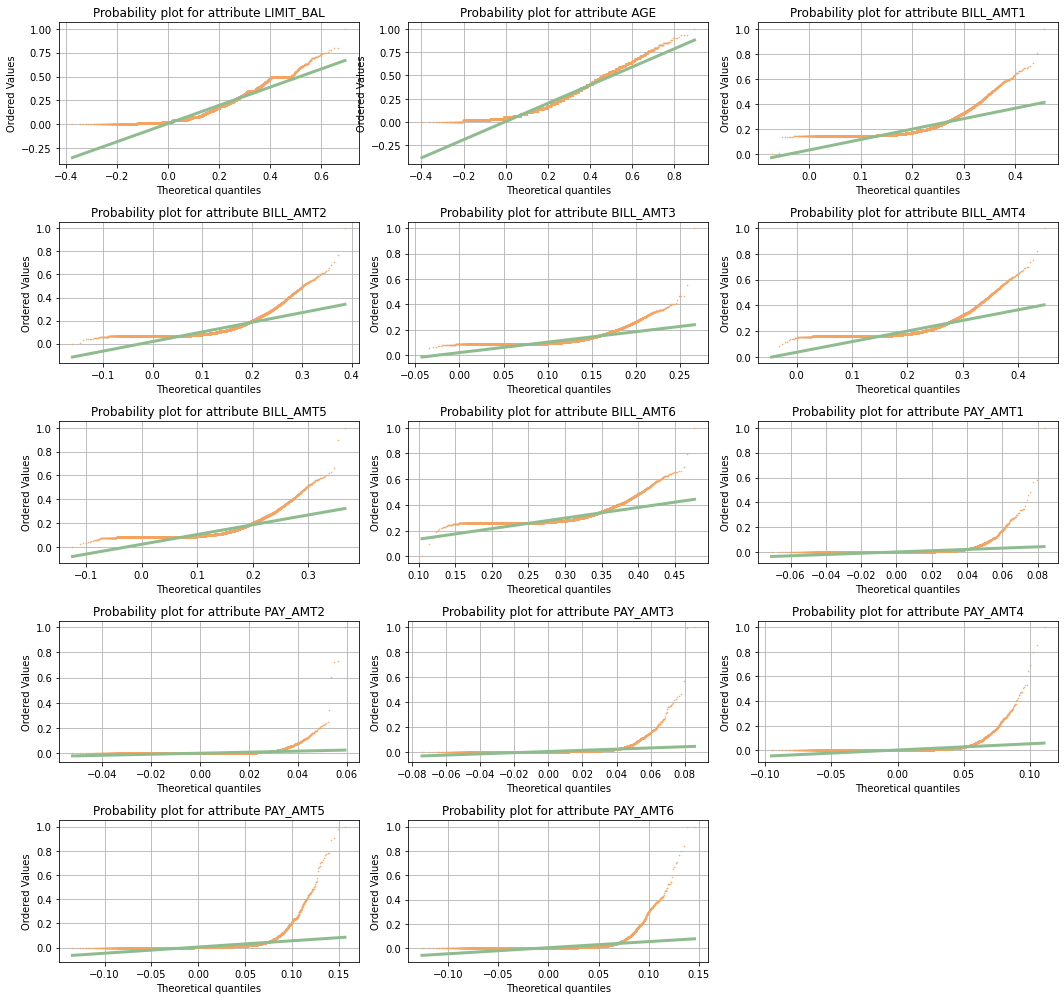

In [534]:
#### Q-Q plot
from scipy import stats

figs, axs= plt.subplots(5, 3, figsize=(15, 14))

i, j = 0, 0
d1 = ['BILL_AMT' + str(i) for i in range(1, 7)]
d2 = ['PAY_AMT' + str(i) for i in range(1, 7)]
d =  ['LIMIT_BAL', 'AGE'] + d1 + d2
for attribute in d:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(
        mms_cp[attribute], 
        dist="norm", 
        sparams = (mms_cp[attribute].mean(), mms_cp[attribute].std()),
        plot=axs[i, j]
    )
    
    axs[i, j].get_lines()[0].set_marker('.')
    axs[i, j].get_lines()[0].set_color('sandybrown')
    axs[i, j].get_lines()[0].set_markersize(1.0)
    axs[i, j].set_title('Probability plot for attribute ' + attribute)
    axs[i, j].grid()
    axs[i, j].get_lines()[1].set_linewidth(3.0)
    axs[i, j].get_lines()[1].set_color('darkseagreen')
    j = j+1
    
figs.tight_layout()
axs[4, 2].set_visible(False)
plt.show()

In [535]:
mms_cp.describe()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,...,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.357454,0.473768,0.164623,0.004155,0.455289,0.533968,0.010743,0.091483,0.190298,0.489815,...,0.200759,0.120544,0.290841,0.006467,0.003500,0.005802,0.007776,0.011242,0.009801,0.223134
std,0.479258,0.499320,0.370846,0.064328,0.498005,0.498853,0.103091,0.288300,0.392543,0.499905,...,0.060472,0.060187,0.045740,0.018967,0.013709,0.019621,0.025300,0.035740,0.033400,0.416355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162332,0.082413,0.261961,0.001145,0.000490,0.000435,0.000480,0.000607,0.000261,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.178040,0.098587,0.274134,0.002404,0.001192,0.002009,0.002415,0.003517,0.002837,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.211260,0.130298,0.298727,0.005729,0.002969,0.005022,0.006464,0.009476,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### FInd outliers for variables transformed with standard scaler

In [278]:
# Isolation forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
is_outliers = isolation_forest.fit_predict(std_cp)

In [279]:
from sklearn.svm import OneClassSVM
nu=0.1
one_class_svm = OneClassSVM(nu = nu, kernel='poly')
ocsvm_outliers = one_class_svm.fit_predict(std_cp)

In [280]:
from sklearn.svm import OneClassSVM
nu=0.2
one_class_svm = OneClassSVM(nu=nu)
svdd_outliers = one_class_svm.fit_predict(std_cp)

In [281]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=200)
lof_outliers = lof.fit_predict(std_cp)

In [282]:
num_is_outliers = len(np.where(is_outliers == -1)[0])
num_oc_outliers = len(np.where(ocsvm_outliers == -1)[0])
num_svdd_outliers = len(np.where(svdd_outliers == -1)[0])
num_lof_outliers = len(np.where(lof_outliers == -1)[0])

In [283]:
print('Outliers with Isolation Forest:', num_is_outliers)
print('Outliers with One Class SVM:', num_oc_outliers)
print('Outliers with LOF:', num_lof_outliers)
print('Outliers with SVMDD:',num_svdd_outliers)

Outliers with Isolation Forest: 3824
Outliers with One Class SVM: 3003
Outliers with LOF: 3361
Outliers with SVMDD: 5921


In [284]:
#mask = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)
outliers = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)&(svdd_outliers == -1)
common_outlier = np.sum(outliers)
print('The previous algorithms indentify:', common_outlier,  'outliers in common.')

The previous algorithms indentify: 91 outliers in common.


In [345]:
print(std_cp.shape)
std_cp.drop(std_cp[outliers].index, axis=0, inplace=True)
print(std_cp.shape)

(29601, 94) (17762,)
(29510, 94) (17762,)


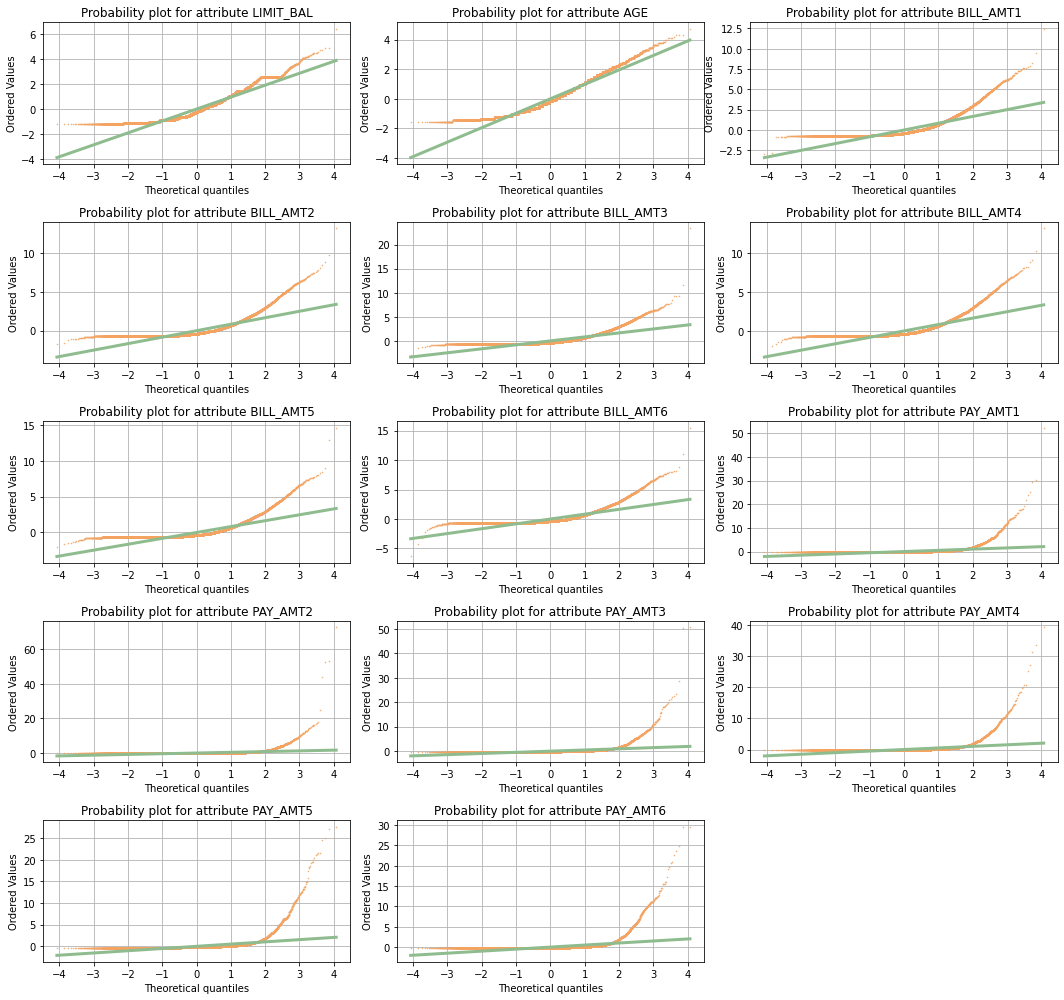

In [286]:
from scipy import stats

figs, axs= plt.subplots(5, 3, figsize=(15, 14))

i, j = 0, 0
d1 = ['BILL_AMT' + str(i) for i in range(1, 7)]
d2 = ['PAY_AMT' + str(i) for i in range(1, 7)]
d =  ['LIMIT_BAL', 'AGE'] + d1 + d2
for attribute in d:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(
        std_cp[attribute], 
        dist="norm", 
        sparams = (std_cp[attribute].mean(), std_cp[attribute].std()),
        plot=axs[i, j]
    )
    
    axs[i, j].get_lines()[0].set_marker('.')
    axs[i, j].get_lines()[0].set_color('sandybrown')
    axs[i, j].get_lines()[0].set_markersize(1.0)
    axs[i, j].set_title('Probability plot for attribute ' + attribute)
    axs[i, j].grid()
    axs[i, j].get_lines()[1].set_linewidth(3.0)
    axs[i, j].get_lines()[1].set_color('darkseagreen')
    j = j+1
    
figs.tight_layout()
axs[4, 2].set_visible(False)
plt.show()

### Data partition

##### Test and Train partition

In [378]:
X0 = mms_cp.drop(['default'], axis=1)
Y0 = mms_cp.default
X0.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0,1,1,0,0,0,...,-0.666636,-0.671638,-0.662794,-0.652873,-0.339576,-0.223846,-0.294259,-0.305828,-0.313214,-0.292397
1,0,1,0,0,0,1,0,1,0,0,...,-0.637823,-0.620722,-0.605936,-0.598145,-0.339576,-0.210358,-0.237369,-0.242143,-0.313214,-0.179118
2,0,1,0,0,0,1,0,1,0,0,...,-0.480574,-0.448631,-0.416799,-0.391921,-0.247906,-0.188674,-0.237369,-0.242143,-0.247560,-0.009199
3,0,1,0,0,0,1,1,0,0,0,...,0.036005,-0.231039,-0.186223,-0.156998,-0.218799,-0.166165,-0.225992,-0.235774,-0.243030,-0.235758
4,0,1,0,0,1,0,1,0,0,0,...,-0.158529,-0.345787,-0.347713,-0.331805,-0.218799,1.337083,0.274635,0.267339,-0.267978,-0.253939


In [379]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.20, random_state=10)
print(X0_train.shape, Y0_train.shape)
print(X0_test.shape, Y0_test.shape)

(23608, 93) (23608,)
(5902, 93) (5902,)


### Modeling stage

In [536]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std

#### Cross validation 
Statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

##### k-Nearest Neighbor

In [537]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_scores = cross_val_score(knn, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(knn_scores), std(knn_scores)))

Accuracy: 0.772 (0.007)


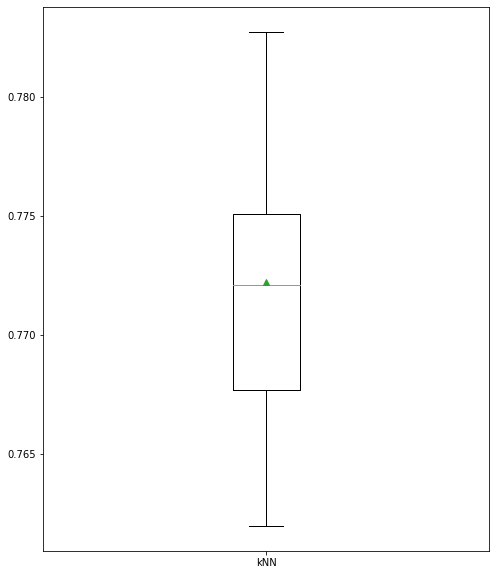

In [538]:
plt.boxplot(knn_scores, labels=['kNN'], showmeans=True)
plt.show()

In [539]:
knn_recall = cross_val_score(knn, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(knn_recall), std(knn_recall)))

Recall: 0.385 (0.016)


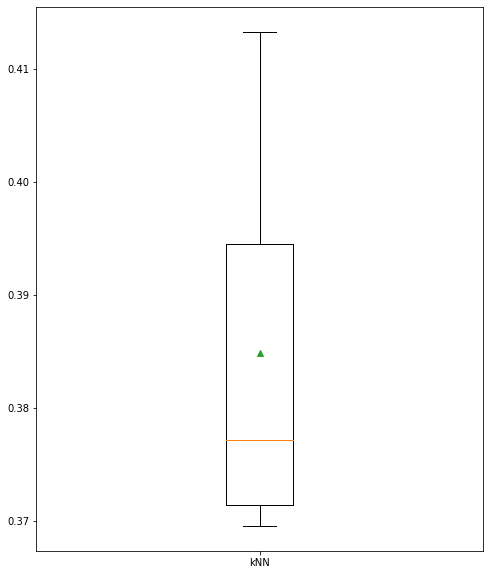

In [540]:
plt.boxplot(knn_recall, labels=['kNN'], showmeans=True)
plt.show()

In [541]:
knn_f1 = cross_val_score(knn, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(knn_f1), std(knn_f1)))
knn_auc = cross_val_score(knn, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(knn_auc), std(knn_auc)))

f1-score: 0.432 (0.010)
ROC-AUC: 0.681 (0.010)


In [542]:
knn.fit(X0_train, Y0_train)
knn_pred = knn.predict(X0_test)

###### Confusion Matrix

In [543]:
print(confusion_matrix(Y0_test, knn_pred))

[[4082  546]
 [ 797  477]]


###### Classification report

In [544]:
print(classification_report(Y0_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4628
           1       0.47      0.37      0.42      1274

    accuracy                           0.77      5902
   macro avg       0.65      0.63      0.64      5902
weighted avg       0.76      0.77      0.76      5902



In [545]:
# Keep probabilities for the positive outcome only
knn_yhat = knn.predict_proba(X0_test)
knn_pos_probs = knn_yhat[:,1]

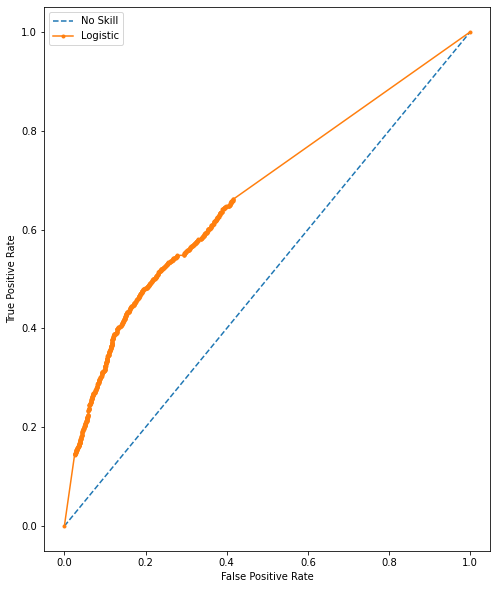

In [546]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, knn_pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [547]:
from sklearn.inspection import permutation_importance
knn_features = permutation_importance(knn, X0_test, Y0_test, scoring='accuracy')
knn_importance = knn_features.importances_mean

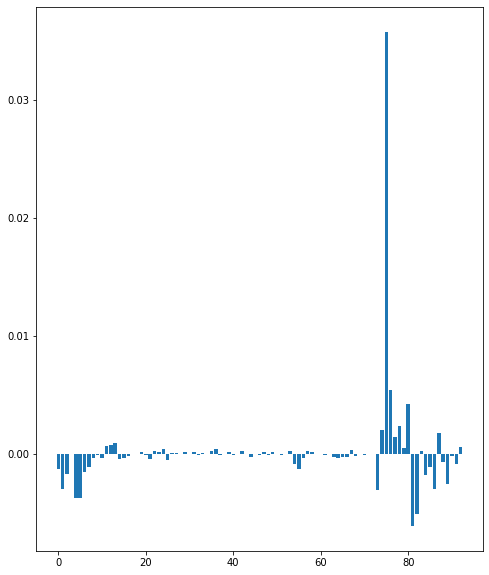

In [549]:
# plot feature importance
plt.bar([x for x in range(len(knn_importance))], knn_importance)
plt.show()

In [548]:
mean_squared_error(Y0_test, knn_pred)

0.227549983056591

##### Logistic Regression (LR)

In [550]:
lr = LogisticRegression(solver='liblinear', max_iter=90)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lr_scores = cross_val_score(lr, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(lr_scores), std(lr_scores)))

Accuracy: 0.819 (0.009)


In [552]:
lr_recall = cross_val_score(lr, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(lr_recall), std(lr_recall)))

Recall: 0.364 (0.020)


In [554]:
lr_f1 = cross_val_score(lr, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(lr_f1), std(lr_f1)))
lr_auc = cross_val_score(lr, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(lr_auc), std(lr_auc)))

f1-score: 0.475 (0.023)
ROC-AUC: 0.770 (0.011)


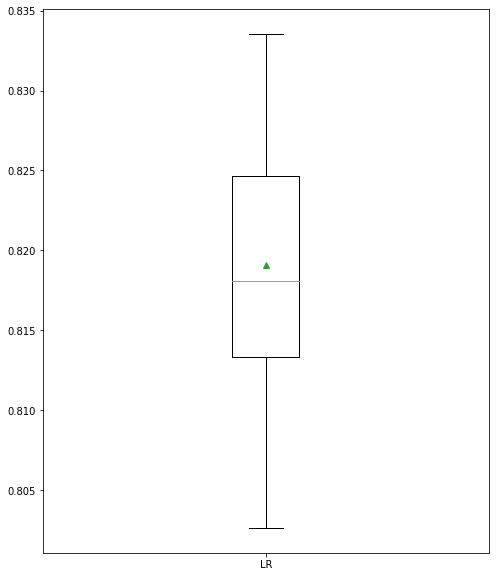

In [551]:
plt.boxplot(lr_scores, labels=['LR'], showmeans=True)
plt.show()

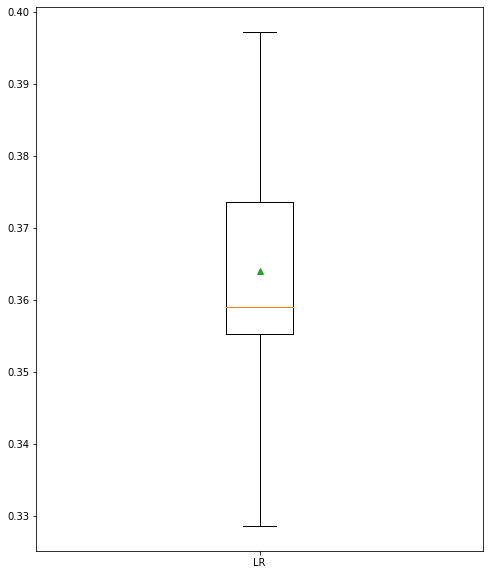

In [553]:
plt.boxplot(lr_recall, labels=['LR'], showmeans=True)
plt.show()

###### Prediction

In [557]:
lr.fit(X0_train, Y0_train)
lr_pred = lr.predict(X0_test)

###### Confusion matrix

In [558]:
print(confusion_matrix(Y0_test, lr_pred))

[[4396  232]
 [ 835  439]]


###### Classification report

In [559]:
print(classification_report(Y0_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4628
           1       0.65      0.34      0.45      1274

    accuracy                           0.82      5902
   macro avg       0.75      0.65      0.67      5902
weighted avg       0.80      0.82      0.80      5902



###### ROC curve

In [560]:
# Keep probabilities for the positive outcome only
lr_yhat = model.predict_proba(X0_test)
lr_pos_probs = lr_yhat[:,1]

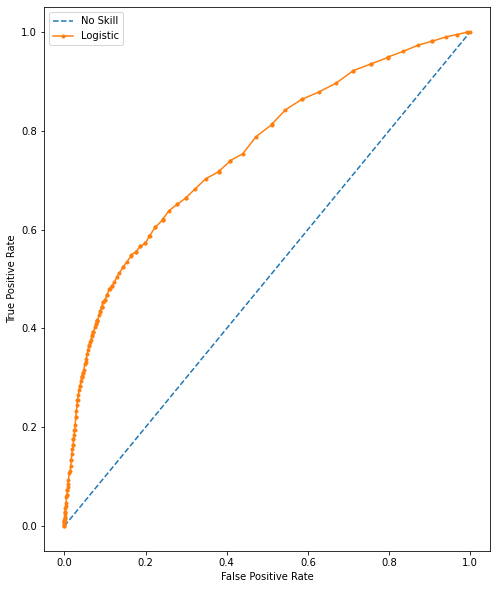

In [561]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, lr_pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

###### Feature importance

In [562]:
lr_importance = lr.coef_[0]

In [563]:
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.23734
Feature: 1, Score: 0.28798
Feature: 2, Score: 0.25612
Feature: 3, Score: -1.15678
Feature: 4, Score: -0.10532
Feature: 5, Score: -0.27003
Feature: 6, Score: -0.11212
Feature: 7, Score: -0.24463
Feature: 8, Score: -0.01860
Feature: 9, Score: -0.38816
Feature: 10, Score: -0.06655
Feature: 11, Score: -1.01636
Feature: 12, Score: -0.11122
Feature: 13, Score: 0.95485
Feature: 14, Score: 0.67880
Feature: 15, Score: 0.24514
Feature: 16, Score: 0.19247
Feature: 17, Score: -0.54065
Feature: 18, Score: 0.23930
Feature: 19, Score: -0.56297
Feature: 20, Score: -0.05623
Feature: 21, Score: -0.16032
Feature: 22, Score: 0.09252
Feature: 23, Score: -0.52739
Feature: 24, Score: 0.14326
Feature: 25, Score: 0.21995
Feature: 26, Score: -0.62201
Feature: 27, Score: 0.41519
Feature: 28, Score: 0.47434
Feature: 29, Score: -0.04779
Feature: 30, Score: -0.30688
Feature: 31, Score: -0.27688
Feature: 32, Score: -0.29450
Feature: 33, Score: -0.17436
Feature: 34, Score: 0.15916
Feature: 

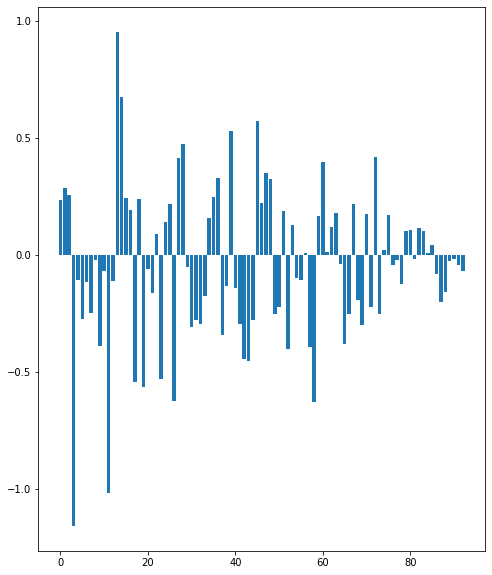

In [564]:
plt.bar([x for x in range(len(lr_importance))], lr_importance)
plt.show()

###### Mean Squared Error

In [ ]:
mean_squared_error(Y0_test, lr_pred)

##### Support Vector Machine (SVM)

In [436]:
#model = SVC(class_weight='balanced')
model = SVC()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.819 (0.010)


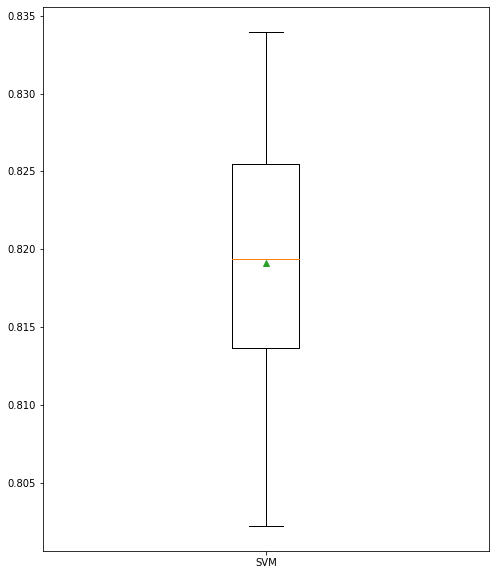

In [437]:
plt.boxplot(scores, labels=['SVM'], showmeans=True)
plt.show()

In [438]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.356 (0.020)


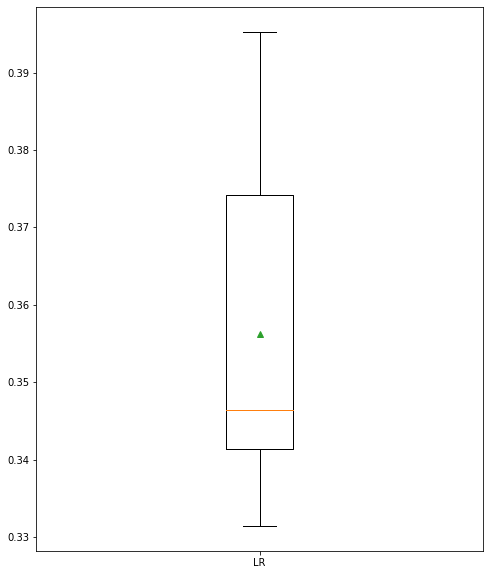

In [439]:
plt.boxplot(recall, labels=['LR'], showmeans=True)
plt.show()

In [440]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.470 (0.022)
ROC-AUC: 0.721 (0.010)


In [441]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[4413  215]
 [ 834  440]]


In [442]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4628
           1       0.67      0.35      0.46      1274

    accuracy                           0.82      5902
   macro avg       0.76      0.65      0.67      5902
weighted avg       0.80      0.82      0.80      5902



In [450]:
# Keep probabilities for the positive outcome only
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

AttributeError: predict_proba is not available when  probability=False

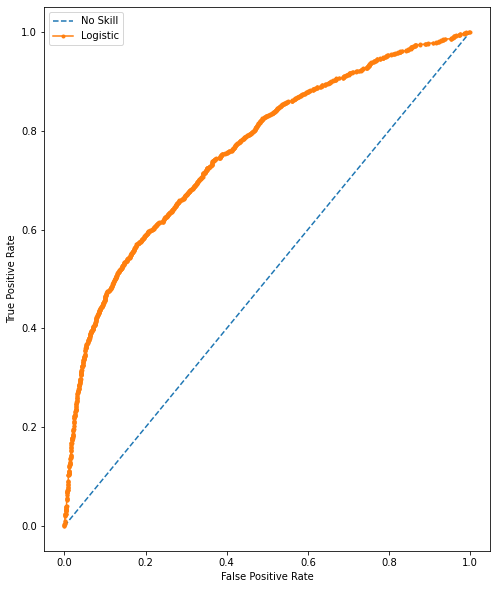

In [446]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
mean_squared_error(Y0_test, Y0_pred)

##### Multi-layer Perceptron Classifier

In [452]:
model = MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.818 (0.010)


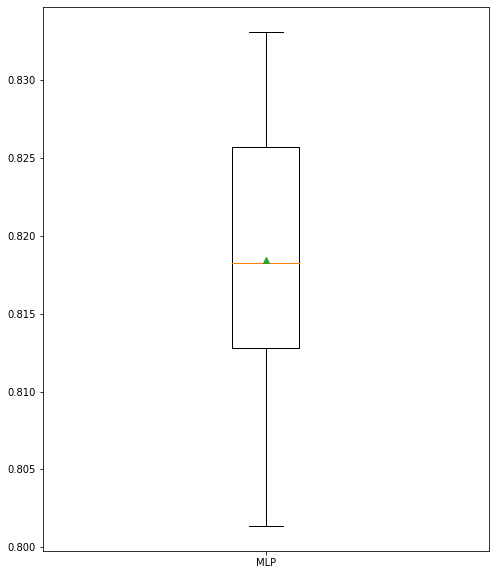

In [453]:
plt.boxplot(scores, labels=['MLP'], showmeans=True)
plt.show()

In [454]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.374 (0.021)


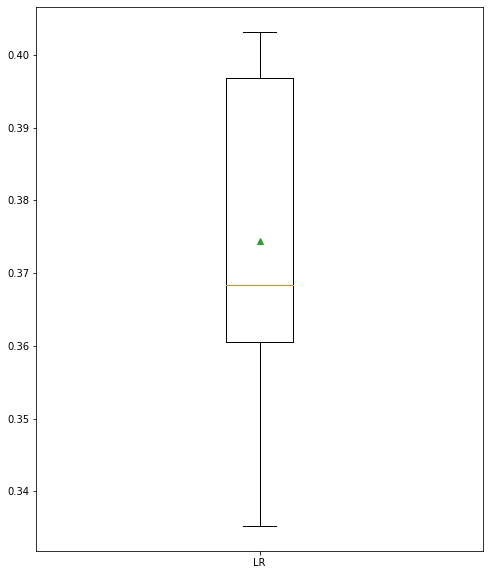

In [455]:
plt.boxplot(recall, labels=['LR'], showmeans=True)
plt.show()

In [456]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.481 (0.023)
ROC-AUC: 0.780 (0.010)


In [457]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[4373  255]
 [ 823  451]]


In [458]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4628
           1       0.64      0.35      0.46      1274

    accuracy                           0.82      5902
   macro avg       0.74      0.65      0.67      5902
weighted avg       0.80      0.82      0.80      5902



In [459]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

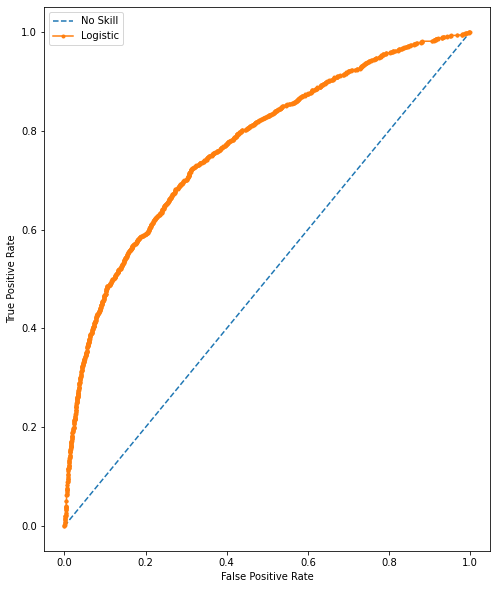

In [460]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
mean_squared_error(Y0_test, Y0_pred)

##### Decision tree classifier

In [461]:
model = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.718 (0.013)


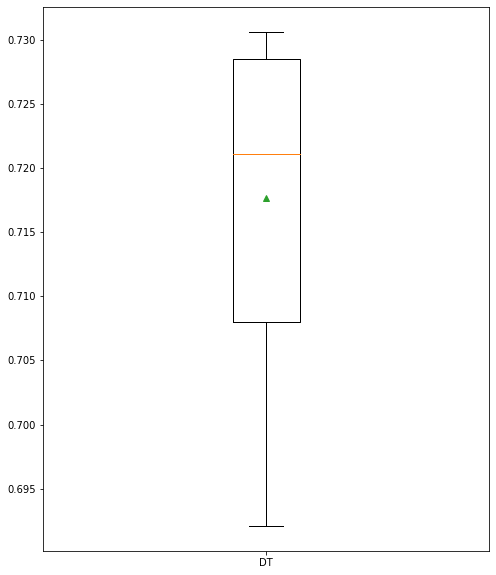

In [462]:
plt.boxplot(scores, labels=['DT'], showmeans=True)
plt.show()

In [463]:
rll = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(rll), std(rll)))

Recall: 0.417 (0.022)


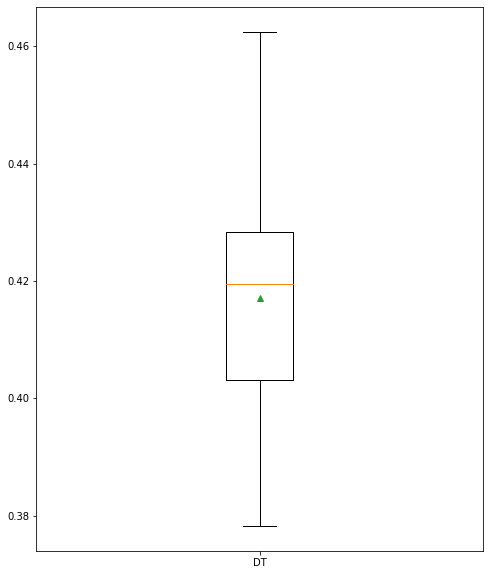

In [464]:
plt.boxplot(rll, labels=['DT'], showmeans=True)
plt.show()

In [465]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.398 (0.014)
ROC-AUC: 0.609 (0.015)


In [466]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[3716  912]
 [ 784  490]]


In [467]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4628
           1       0.35      0.38      0.37      1274

    accuracy                           0.71      5902
   macro avg       0.59      0.59      0.59      5902
weighted avg       0.72      0.71      0.72      5902



In [468]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

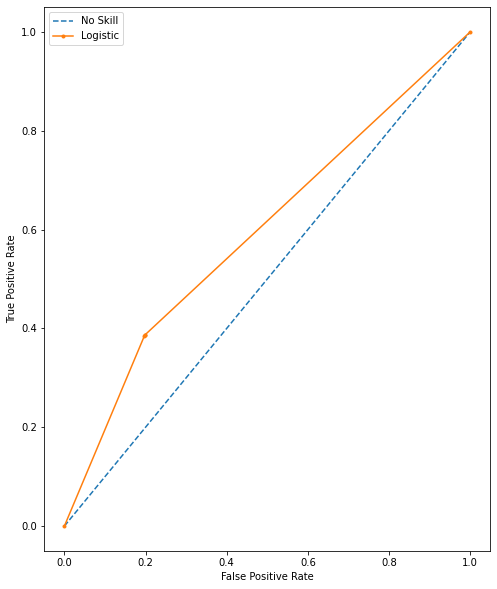

In [469]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [470]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00713
Feature: 1, Score: 0.01111
Feature: 2, Score: 0.00819
Feature: 3, Score: 0.00040
Feature: 4, Score: 0.00815
Feature: 5, Score: 0.00876
Feature: 6, Score: 0.00639
Feature: 7, Score: 0.00729
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00122
Feature: 10, Score: 0.00184
Feature: 11, Score: 0.00194
Feature: 12, Score: 0.00060
Feature: 13, Score: 0.00010
Feature: 14, Score: 0.00039
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00017
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00029
Feature: 21, Score: 0.00112
Feature: 22, Score: 0.00076
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00024
Feature: 25, Score: 0.00035
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00022
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00089
Feature: 32, Score: 0.00045
Feature: 33, Score: 0.00155
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00163
Fe

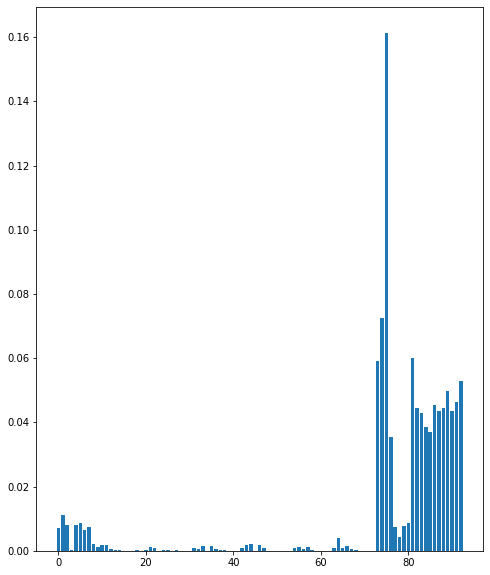

In [471]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### Random Forest

In [472]:
model = RandomForestClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
acc = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(acc), std(acc)))

Accuracy: 0.814 (0.010)


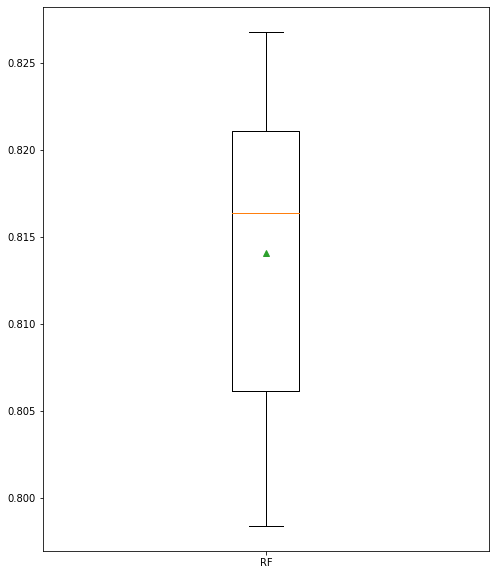

In [473]:
plt.boxplot(acc, labels=['RF'], showmeans=True)
plt.show()

In [474]:
rll = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(rll), std(rll)))

Recall: 0.381 (0.020)


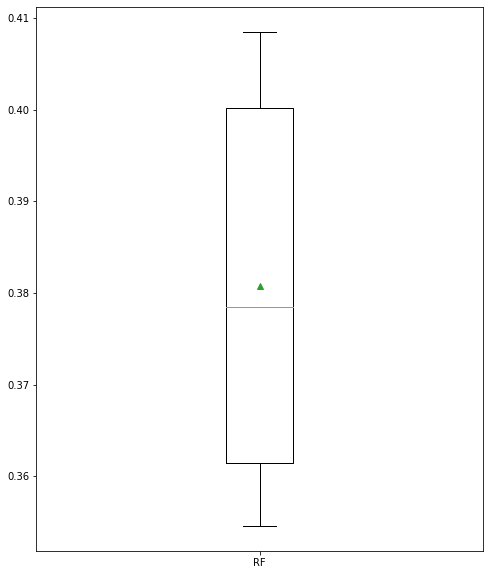

In [475]:
plt.boxplot(rll, labels=['RF'], showmeans=True)
plt.show()

In [476]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.480 (0.021)
ROC-AUC: 0.767 (0.016)


In [477]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[4336  292]
 [ 806  468]]


In [478]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4628
           1       0.62      0.37      0.46      1274

    accuracy                           0.81      5902
   macro avg       0.73      0.65      0.67      5902
weighted avg       0.79      0.81      0.80      5902



In [479]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

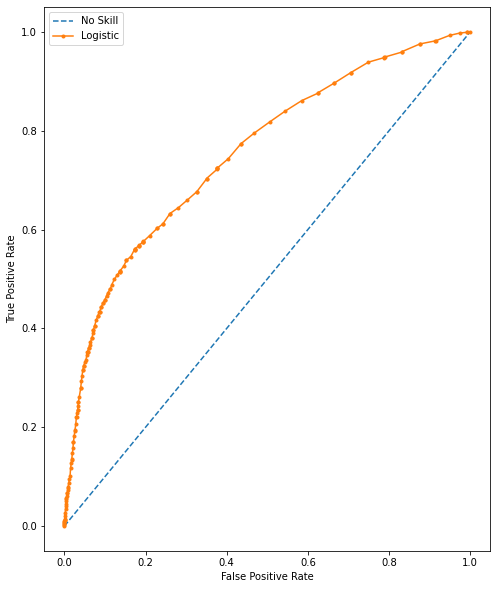

In [480]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [481]:
importance = model.feature_importances_

In [482]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00857
Feature: 1, Score: 0.00969
Feature: 2, Score: 0.00784
Feature: 3, Score: 0.00028
Feature: 4, Score: 0.00887
Feature: 5, Score: 0.00904
Feature: 6, Score: 0.00910
Feature: 7, Score: 0.00861
Feature: 8, Score: 0.00174
Feature: 9, Score: 0.00123
Feature: 10, Score: 0.00379
Feature: 11, Score: 0.01072
Feature: 12, Score: 0.00511
Feature: 13, Score: 0.03241
Feature: 14, Score: 0.00189
Feature: 15, Score: 0.00031
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00103
Feature: 21, Score: 0.00229
Feature: 22, Score: 0.00351
Feature: 23, Score: 0.00008
Feature: 24, Score: 0.01196
Feature: 25, Score: 0.00124
Feature: 26, Score: 0.00039
Feature: 27, Score: 0.00011
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00122
Feature: 32, Score: 0.00280
Feature: 33, Score: 0.00289
Feature: 34, Score: 0.00002
Feature: 35, Score: 0.01208
Fe

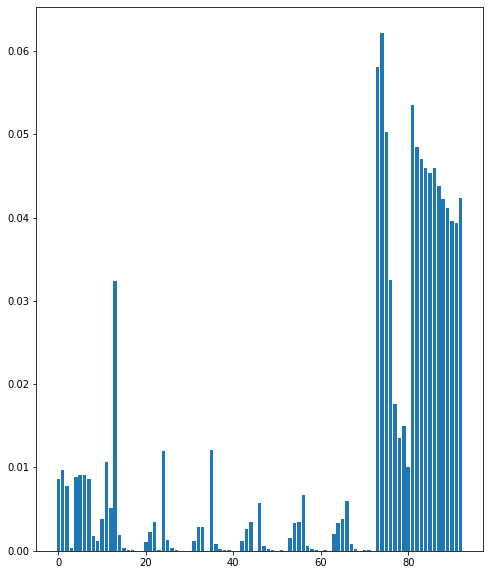

In [483]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [485]:
mean_squared_error(Y0_test, Y0_pred)

0.1860386309725517